In [ ]:
# Imports
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import matplotlib.pyplot as plt
import netCDF4
import xarray as xr
import metpy
from datetime import datetime
import datetime as dt
from metpy.units import units
import scipy.ndimage as ndimage
from metpy.plots import USCOUNTIES
import cartopy
from scipy.ndimage.filters import generic_filter as gf
from metpy.plots import USCOUNTIES
from metpy.plots import SkewT
import metpy.calc as mpcalc
from math import log, exp
import matplotlib.patches as mpatches
import matplotlib.lines as lines
import supplementary_tools as spt
import soundingmaps as smap
from siphon.simplewebservice.wyoming import WyomingUpperAir


In [3]:
ds = xr.open_dataset('http://nomads.ncep.noaa.gov:80/dods/gfs_0p25_1hr/gfs20210313/gfs_0p25_1hr_12z')

C:\Users\Jack\anaconda3\envs\jupyterdev\lib\site-packages\xarray\coding\times.py:113: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


In [4]:
data = ds.metpy.assign_crs(grid_mapping_name='latitude_longitude')
data = data.isel(time=12)

#Rename variables to useful things
data = data.rename(spt.get_varlist('GFS'))

In [5]:
prs_temps = data['temperature'].isel(lev=slice(1,18,1))
prs_relh = data['rh'].isel(lev=slice(1,18,1))
sfc_pressure = data['spres']/100

In [6]:
centerlat = 34.6
centerlon = 101.3
domainsize='local'
model = 'GFS'
cape_bool = True
wetbulb_bool = True


CAPE + Wetbulb


TypeError: unsupported operand type(s) for *: 'int' and 'memoryview'

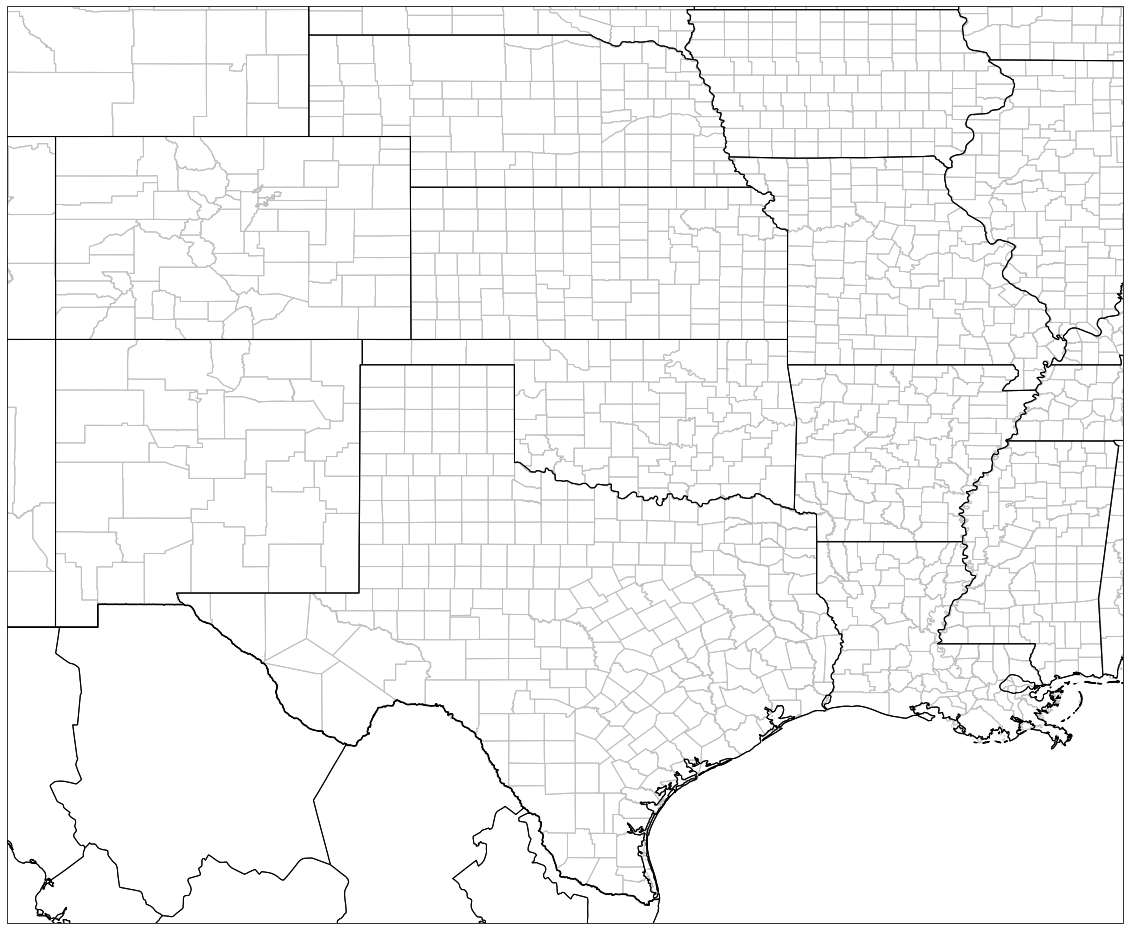

In [30]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(111, projection = ccrs.PlateCarree())

ax1.add_feature(USCOUNTIES.with_scale('500k'), edgecolor='silver')
ax1.coastlines(resolution='10m')
ax1.add_feature(cfeature.BORDERS.with_scale('10m'), linewidth=1.5)
ax1.add_feature(cfeature.STATES.with_scale('10m'), linewidth=1.0)
ax1.set_extent((250,272,25.5,43.5))

smap.plot_soundings(fig,ax1,prs_temps,prs_relh,sfc_pressure,centerlat,centerlon,domainsize,model,cape=cape_bool,wetbulb=wetbulb_bool)
